In [37]:
import pandas as pd
import os
import numpy as np
import scipy.stats

In [38]:
#plotting
import matplotlib
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

## Get race mapping

In [39]:
race=pd.read_csv("/cellar/controlled/dbGaP/2017_dbGap_phs000209.v13.p3_MESA/78672/PhenoGenotypeFiles/RootStudyConsentSet_phs000209.MESA.v13.p3.c1.HMB/PhenotypeFiles/phs000209.v13.pht001116.v10.p3.c1.MESA_Exam1Main.HMB.txt",comment="#",delimiter="\t")
print(race.shape)
afr=race[race["race1c"]==3]["dbGaP_Subject_ID"].tolist()
sample=pd.read_csv("/cellar/controlled/dbGaP/2017_dbGap_phs000209.v13.p3_MESA/78672/PhenoGenotypeFiles/RootStudyConsentSet_phs000209.MESA.v13.p3.c1.HMB/PhenotypeFiles/phs000209.v13.pht001110.v8.p3.MESA_Sample.MULTI.txt",comment="#",delimiter="\t")
afr_subjid=sample[sample["dbGaP_Subject_ID"].isin(afr)]["SUBJID"].unique().tolist()

/cellar/users/mpagadal/Programs/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3526: DtypeWarning: Columns (10,16,17,20,23,24,25,26,27,33,44,46,48,49,72,74,75,76,78,92,93,94,95,96,97,98,99,100,101,102,117,120,122,123,124,125,136,137,140,141,145,147,148,149,172,173,174,175,176,215,216,217,219,220,221,222,223,224,225,228,229,230,231,232,233,234,236,237,239,240,241,242,244,245,247,248,250,253,256,257,258,259,260,261,262,264,266,267,268,270,271,272,273,274,275,276,277,278,279,280,281,282,284,290,291,293,294,296,297,299,300,301,302,303,304,305,307,308,309,310,312,315,316,496,497,498,500,501,502,503,505,506,507,509,511,513,514,516,517,518,519,520,521,522,523,524,525,526,527,529,530,531,532,533,534,541,542,543,544,546,646,647,648,649,657,658,659,661,662,663,664,665,666,667,668,669,675,678,684,685,686,711,714,715,716,721,723,724,725,726,727,728,729,730,731,732,733,734,735,740,742,745,746,748,749,750,751,752,753,754,755,756,758,760,761,762,763,764,765,766,767,768,769,77

(5830, 1161)


In [40]:
df_afr=pd.DataFrame({"FID":0,"IID":afr_subjid})
df_afr["IID"]="0_"+df_afr["IID"].astype(str)
print(df_afr.shape)
df_afr.to_csv("../data/mesa/african.pts.txt",header=None,index=None,sep="\t")

(1482, 2)


### subject ID

In [41]:
df=pd.read_csv("/cellar/controlled/dbGaP/2017_dbGap_phs000209.v13.p3_MESA/78672/PhenoGenotypeFiles/RootStudyConsentSet_phs000209.MESA.v13.p3.c1.HMB/PhenotypeFiles/phs000209.v13.pht001109.v1.p3.MESA_Pedigree.MULTI.txt",comment="#",delimiter="\t")
df["ID"]=0

In [42]:
remove=df["MOTHER"].unique().tolist()+df["FATHER"].unique().tolist()
keep=df[~df["SUBJID"].isin(remove)]
keep=keep[keep["TWINID"].isnull()]

In [43]:
related=pd.read_csv("../data/mesa/patients/remove.related.first.degree.txt",header=None,delimiter="\t")
related[1]=related[1].str.split("_").str[1]
related[1]=related[1].astype(int)

In [44]:
keep=keep[~keep["SUBJID"].isin(related[1].tolist())]

In [45]:
df[~df["SUBJID"].isin(keep["SUBJID"].tolist())][["ID","SUBJID"]].to_csv("../data/mesa/patients/remove.related.first.degree.pedigree.txt",header=None,index=None,sep="\t")

## Pheno

In [46]:
pheno=pd.read_csv("/cellar/controlled/dbGaP/2017_dbGap_phs000209.v13.p3_MESA/78672/PhenoGenotypeFiles/RootStudyConsentSet_phs000209.MESA.v13.p3.c1.HMB/PhenotypeFiles/phs000209.v13.pht001208.v2.p3.c1.MESA_AncilMesaSexHormone.HMB.txt",comment="#",delimiter="\t")
pheno_afr=pheno[pheno["dbGaP_Subject_ID"].isin(afr)]
mp_sample=dict(zip(sample["dbGaP_Subject_ID"],sample["SUBJID"]))
pheno_afr["SUBJID"]=pheno_afr["dbGaP_Subject_ID"].map(mp_sample)
pheno_afr["SUBJID"]=pheno_afr["SUBJID"].astype(int)

/tmp/ipykernel_1786333/2797076554.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pheno_afr["SUBJID"]=pheno_afr["dbGaP_Subject_ID"].map(mp_sample)
/tmp/ipykernel_1786333/2797076554.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pheno_afr["SUBJID"]=pheno_afr["SUBJID"].astype(int)


In [47]:
pheno_afr=pheno_afr[~pheno_afr["SUBJID"].isin(df[~df["SUBJID"].isin(keep["SUBJID"].tolist())]["SUBJID"].tolist())]

In [48]:
pheno_afr["SUBJID"]="0_"+pheno_afr["SUBJID"].astype(str)
pheno_afr["SUBJID2"]=0
pheno_afr[["SUBJID2","SUBJID","tottst1","freetst1","shbg1"]].to_csv("../data/mesa/pheno.tsv",index=None,sep="\t")

In [49]:
pheno=pd.read_csv("../data/mesa/phenotypes/pheno.rank.norm.tsv",delimiter="\t")

In [50]:
pheno=pheno.fillna("NA")

In [51]:
pheno=pheno.rename(columns={"SUBJID2":"FID","SUBJID":"IID"})

In [52]:
pheno.to_csv("../data/mesa/phenotypes/pheno.rank.norm.tsv",index=None,sep="\t")

### make covariate file

In [53]:
cov=race[race["dbGaP_Subject_ID"].isin(afr)]
cov["SUBJID"]=cov["dbGaP_Subject_ID"].map(mp_sample)

/tmp/ipykernel_1786333/1213312504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cov["SUBJID"]=cov["dbGaP_Subject_ID"].map(mp_sample)


In [54]:
cov["SUBJID"]="0_"+cov["SUBJID"].astype(str)
cov["SUBJID2"]=0

/tmp/ipykernel_1786333/4077829195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cov["SUBJID"]="0_"+cov["SUBJID"].astype(str)
/tmp/ipykernel_1786333/4077829195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cov["SUBJID2"]=0


In [55]:
cov=cov[["SUBJID2","SUBJID","age1c","gender1"]]
cov.columns=["FID","IID","Age","Gender"]

In [56]:
pc=pd.read_csv("/cellar/users/mpagadal/ancestry-analysis/mesa/genotypes2/mesa.ancestry",delimiter="\t")

In [57]:
pc["IID"]="0_"+pc["IID"]

In [58]:
cov=pd.merge(cov,pc,on=["FID","IID"],how="left")

In [59]:
cov=cov.fillna("NA")

In [60]:
cov.to_csv("../data/mesa/covariates/cov.tsv",index=None,sep="\t")

## get results

In [61]:
def compile_stats(direct):
    files=[x for x in os.listdir(direct) if "linear" in x]
    compiled_results=pd.DataFrame()
    for x in files:
        results=pd.read_csv(direct+x,delim_whitespace=True)
        compiled_results=compiled_results.append(results)
    compiled_results=compiled_results[compiled_results["TEST"]=="ADD"]
    return(compiled_results)

In [62]:
mesa_tot=compile_stats("../data/mesa/summarystats/tottst1/")
mesa_tot["hg19"]="chr"+mesa_tot["ID"].str.rsplit(":",2).str[0]
mesa_tot["pheno"]="total"

In [63]:
mesa_free=compile_stats("../data/mesa/summarystats/freetst1/")
mesa_free["hg19"]="chr"+mesa_free["ID"].str.rsplit(":",2).str[0]
mesa_free["pheno"]="free"

In [64]:
mesa_shbg=compile_stats("../data/mesa/summarystats/shbg1/")
mesa_shbg["hg19"]="chr"+mesa_shbg["ID"].str.rsplit(":",2).str[0]
mesa_shbg["pheno"]="shbg"

In [67]:
mesa_compiled=mesa_tot.append(mesa_free)
mesa_compiled=mesa_compiled.append(mesa_shbg)

In [75]:
tables2=pd.read_csv("../../supplemental/tables2.csv",delimiter="\t")
tables2["SNP"]=tables2["SNP"].str.split("chr").str[1]
lifted=pd.read_csv("../../notebooks/testosterone.hg19.bed",header=None,delimiter="\t")
lifted["hg19_coord"]=lifted[0].astype(str)+":"+lifted[1].astype(str)

In [76]:
mp_hg19=dict(zip(lifted[3],lifted["hg19_coord"]))

In [77]:
tables2["hg19"]=tables2["SNP"].map(mp_hg19)

In [80]:
tables2=pd.merge(tables2,mesa_compiled,on=["pheno","hg19"],how="left")

In [83]:
table_check=tables2[tables2["group"]=="AFR"]

In [84]:
# table_check=table_check[~table_check["A1_y"].isnull()]
# table_check=table_check[table_check["conditional"]=="ancestry-specific"]

In [85]:
table_check["BETA_y"]=np.where(table_check["A1_x"]!=table_check["A1_y"],table_check["BETA_y"]*-1,table_check["BETA_y"])

/tmp/ipykernel_1786333/3366581479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_check["BETA_y"]=np.where(table_check["A1_x"]!=table_check["A1_y"],table_check["BETA_y"]*-1,table_check["BETA_y"])


In [86]:
table_check["color"]=np.where(table_check["pheno"]=="shbg","blue","green")

/tmp/ipykernel_1786333/4071190201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_check["color"]=np.where(table_check["pheno"]=="shbg","blue","green")


In [87]:
scipy.stats.pearsonr(table_check[~table_check["BETA_y"].isnull()]["BETA_x"],table_check[~table_check["BETA_y"].isnull()]["BETA_y"])

(0.6391209170321944, 0.004296742164895259)

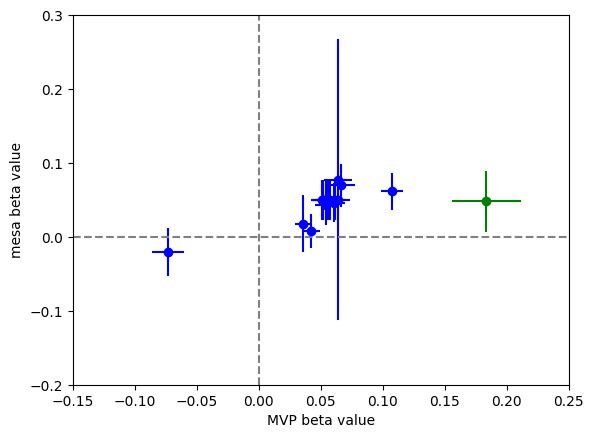

In [89]:
plt.errorbar(table_check[table_check["pheno"]=="total"]["BETA_x"],table_check[table_check["pheno"]=="total"]["BETA_y"], xerr=table_check[table_check["pheno"]=="total"]["SE_x"].tolist(), yerr=table_check[table_check["pheno"]=="total"]["SE_y"].tolist(), color="blue",fmt="o")
plt.errorbar(table_check[table_check["pheno"]=="shbg"]["BETA_x"],table_check[table_check["pheno"]=="shbg"]["BETA_y"], xerr=table_check[table_check["pheno"]=="shbg"]["SE_x"].tolist(), yerr=table_check[table_check["pheno"]=="shbg"]["SE_y"].tolist(), color="green",fmt="o")
plt.xlim(-0.15,0.25)
plt.ylim(-0.20,0.30)
plt.axvline(0,color="grey",linestyle="--")
plt.axhline(0,color="grey",linestyle="--")
plt.xlabel("MVP beta value")
plt.ylabel("mesa beta value")
plt.savefig("../plots/mesa.beta.compare.pdf")

In [1]:
table_check

NameError: name 'table_check' is not defined